# Analysis and Prediction

For this section first we will make a prediction by using timer series analysis. After that we will use the machine learning model to predict whether is it safe to ride an airplane.

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set(style="white")

In [162]:
df = pd.read_pickle('../aircrash-analysis.pkl')
df_summary = pd.read_pickle('../Summary_token_word.pkl')

## Time Series Analysis (Yearly)

### Fatalities 

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [213]:
ts = pd.Series(np.nan,index=pd.date_range('1908','2009',freq='AS'))
X = np.arange(1908,2010).reshape(-1,1)

In [214]:
# Calculating the sum for each year
for year in range(1908,2010):
    ts['{}'.format(year)] = len(df['{}'.format(year)])

y = ts.values

In [215]:
LR = LinearRegression()
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

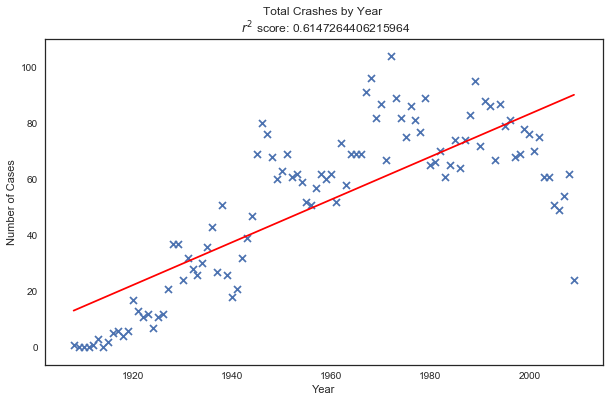

In [216]:
plt.figure(figsize=(10,6))
plt.plot(X,LR.predict(X),color='r')
plt.scatter(X,y,marker='x')
plt.title('Total Crashes by Year \n $r^2$ score: {}'.format(r2_score(y,LR.predict(X))))
plt.xlabel('Year')
plt.ylabel('Number of Cases')

In [217]:
svr = SVR(C=1e2,gamma=0.001)
svr.fit(X,y)

SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

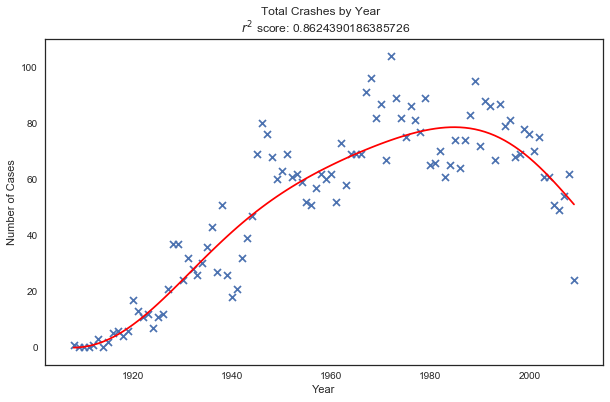

In [218]:
plt.figure(figsize=(10,6))
plt.plot(X,svr.predict(X),color='r')
plt.scatter(X,y,marker='x')
plt.title('Total Crashes by Year  \n $r^2$ score: {}'.format(r2_score(y,svr.predict(X))))
plt.xlabel('Year')
plt.ylabel('Number of Cases')

In [219]:
ts = pd.Series(np.nan,index=pd.date_range('1908','2009',freq='AS'))

In [220]:
# Calculating the sum for each year
for year in range(1908,2010):
    ts['{}'.format(year)] = df['{}'.format(year)].Fatalities.sum()

In [221]:
y = ts.values

In [222]:
LR = LinearRegression()
LR.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

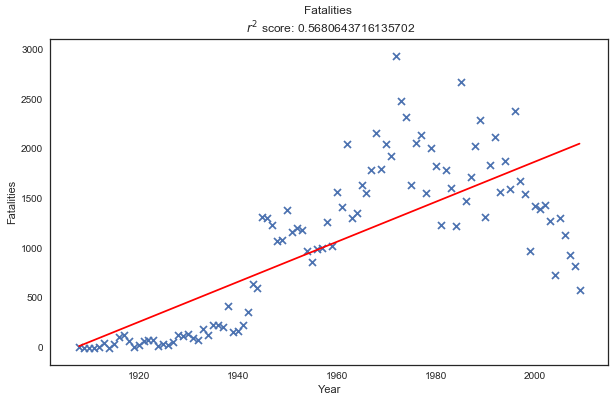

In [223]:
plt.figure(figsize=(10,6))
plt.plot(X,LR.predict(X),color='r')
plt.scatter(X,y,marker='x')
plt.title('Fatalities \n $r^2$ score: {}'.format(r2_score(y,LR.predict(X))))
plt.xlabel('Year')
plt.ylabel('Fatalities')

In [224]:
svr = SVR(C=1e3,gamma=0.001)
svr.fit(X,y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

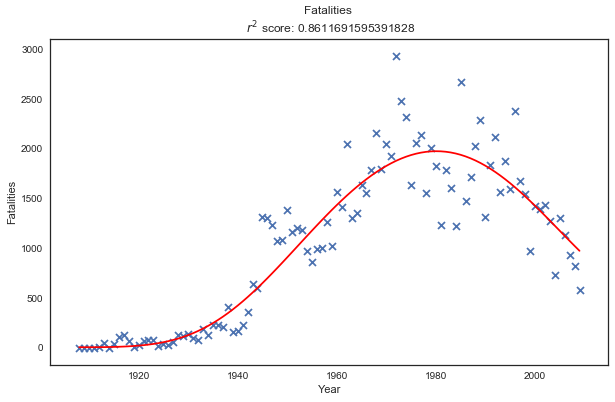

In [225]:
plt.figure(figsize=(10,6))
plt.plot(X,svr.predict(X),color='r')
plt.scatter(X,y,marker='x')
plt.title('Fatalities \n $r^2$ score: {}'.format(r2_score(y,svr.predict(X))))
plt.xlabel('Year')
plt.ylabel('Fatalities')

In [226]:
df

,Aboard,Fatalities,Ground,Survive_Prob,Hours,State_Countries,Source,Destination,Plane_Name,Passenger_Military,Survive_Status
Date,,,,,,,,,,,
1908-09-17,2.0,1.0,0.0,0.500000,17.0,Virginia,Demonstration,Demonstration,Wright,0.0,1.0
1912-07-12,5.0,5.0,0.0,0.000000,6.0,New Jersey,Test flight,Test flight,Dirigible,0.0,0.0
1913-08-06,1.0,1.0,0.0,0.000000,NaN,British Columbia Canada,NaN,NaN,Curtiss,1.0,0.0
1913-09-09,20.0,14.0,0.0,0.300000,18.0,Over the North Sea,NaN,NaN,Zeppelin,0.0,1.0
1913-10-17,30.0,30.0,0.0,0.000000,10.0,Germany,NaN,NaN,Zeppelin,0.0,0.0
1915-03-05,41.0,21.0,0.0,0.487805,1.0,Belgium,NaN,NaN,Zeppelin,0.0,1.0
1915-09-03,19.0,19.0,0.0,0.000000,15.0,Germany,NaN,NaN,Zeppelin,0.0,0.0
1916-07-28,20.0,20.0,0.0,0.000000,NaN,Bulgeria,NaN,NaN,Schutte,0.0,0.0
1916-09-24,22.0,22.0,0.0,0.000000,1.0,England,NaN,NaN,Zeppelin,0.0,0.0
